In [1]:
# list all e_qm*.log files in the current directory

import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd


In [2]:
import os

# Directory containing the uploaded files
files_dir = './'

# List of uploaded files
files = sorted([f for f in os.listdir(files_dir) if f.startswith('e_qm') and f.endswith('.log')])

files

['e_qm_1.log',
 'e_qm_10.log',
 'e_qm_11.log',
 'e_qm_12.log',
 'e_qm_13.log',
 'e_qm_14.log',
 'e_qm_15.log',
 'e_qm_16.log',
 'e_qm_17.log',
 'e_qm_18.log',
 'e_qm_19.log',
 'e_qm_2.log',
 'e_qm_20.log',
 'e_qm_21.log',
 'e_qm_22.log',
 'e_qm_23.log',
 'e_qm_24.log',
 'e_qm_25.log',
 'e_qm_26.log',
 'e_qm_27.log',
 'e_qm_28.log',
 'e_qm_29.log',
 'e_qm_3.log',
 'e_qm_30.log',
 'e_qm_4.log',
 'e_qm_5.log',
 'e_qm_6.log',
 'e_qm_7.log',
 'e_qm_8.log',
 'e_qm_9.log']

In [3]:
# resort the files so that the order is correct, e.g. 2 before 10
files = sorted(files, key=lambda x: int(x.split('_')[2].split('.')[0]))
files

['e_qm_1.log',
 'e_qm_2.log',
 'e_qm_3.log',
 'e_qm_4.log',
 'e_qm_5.log',
 'e_qm_6.log',
 'e_qm_7.log',
 'e_qm_8.log',
 'e_qm_9.log',
 'e_qm_10.log',
 'e_qm_11.log',
 'e_qm_12.log',
 'e_qm_13.log',
 'e_qm_14.log',
 'e_qm_15.log',
 'e_qm_16.log',
 'e_qm_17.log',
 'e_qm_18.log',
 'e_qm_19.log',
 'e_qm_20.log',
 'e_qm_21.log',
 'e_qm_22.log',
 'e_qm_23.log',
 'e_qm_24.log',
 'e_qm_25.log',
 'e_qm_26.log',
 'e_qm_27.log',
 'e_qm_28.log',
 'e_qm_29.log',
 'e_qm_30.log']

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Initialize an empty DataFrame to store the concatenated data
concatenated_data = pd.DataFrame(columns=['Step', 'Energy'])

# Read data from each file and append to the DataFrame
for file in files:
    file_path = os.path.join(files_dir, file)
    data = pd.read_csv(file_path, sep='\t', header=None, names=['Step', 'Energy'])
    concatenated_data = pd.concat([concatenated_data, data], ignore_index=True)

# Convert the 'Step' column to numeric for proper sorting
concatenated_data['Step'] = pd.to_numeric(concatenated_data['Step'])

# Sort the data based on the 'Step' column
concatenated_data = concatenated_data.sort_values(by='Step').reset_index(drop=True)

# Show the concatenated and sorted data
concatenated_data.head()

/tmp/ipykernel_3054380/4178299599.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concatenated_data = pd.concat([concatenated_data, data], ignore_index=True)


,Step,Energy
0,0,-1040.610640
1,1,-1041.222568
2,2,-1041.330408
3,3,-1041.390258
4,4,-1041.140349


In [8]:
len(concatenated_data)

60000

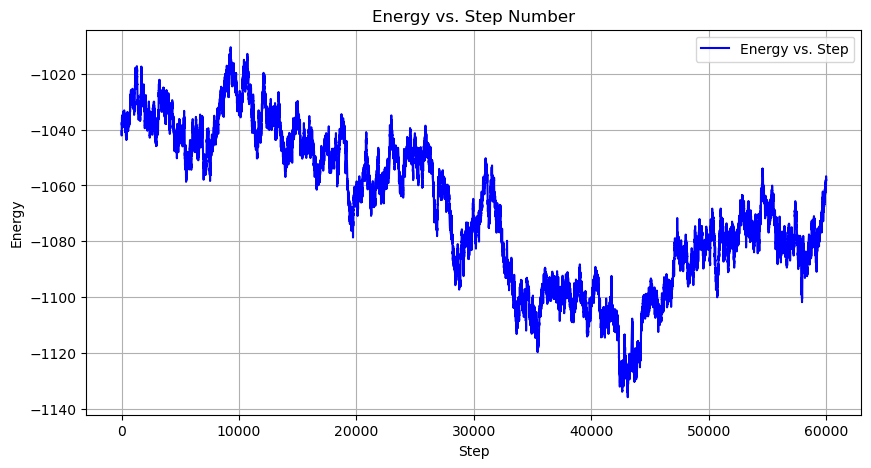

In [9]:
# Set up the plot
plt.figure(figsize=(10, 5))
plt.plot(concatenated_data['Step'], concatenated_data['Energy'], label='Energy vs. Step', color='blue')

# Adding labels and title
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Energy vs. Step Number')

# Adding a grid
plt.grid(True)

# Adding a legend
plt.legend()

# Show the plot
plt.show()


In [18]:
report_file_path = './report_6oim_CYX12_qmmm_report.csv'
data = pd.read_csv(report_file_path)
data.head()

,"#""Step""",Potential Energy (kJ/mole),Kinetic Energy (kJ/mole),Total Energy (kJ/mole),Temperature (K),Box Volume (nm^3)
0,2050,-445903.242337,91454.407420,-354448.834917,301.424632,466.688305
1,2100,-445052.572049,92523.093912,-352529.478137,304.946916,466.688305
2,2150,-445507.470963,91889.141789,-353618.329175,302.857473,466.688305
3,2200,-445122.679327,92424.112390,-352698.566937,304.620683,467.704757
4,2250,-443855.851372,90910.476778,-352945.374594,299.631891,467.352310


In [17]:
columns = ["Potential Energy (kJ/mole)", "Kinetic Energy (kJ/mole)", "Total Energy (kJ/mole)", "Box Volume (nm^3)"]

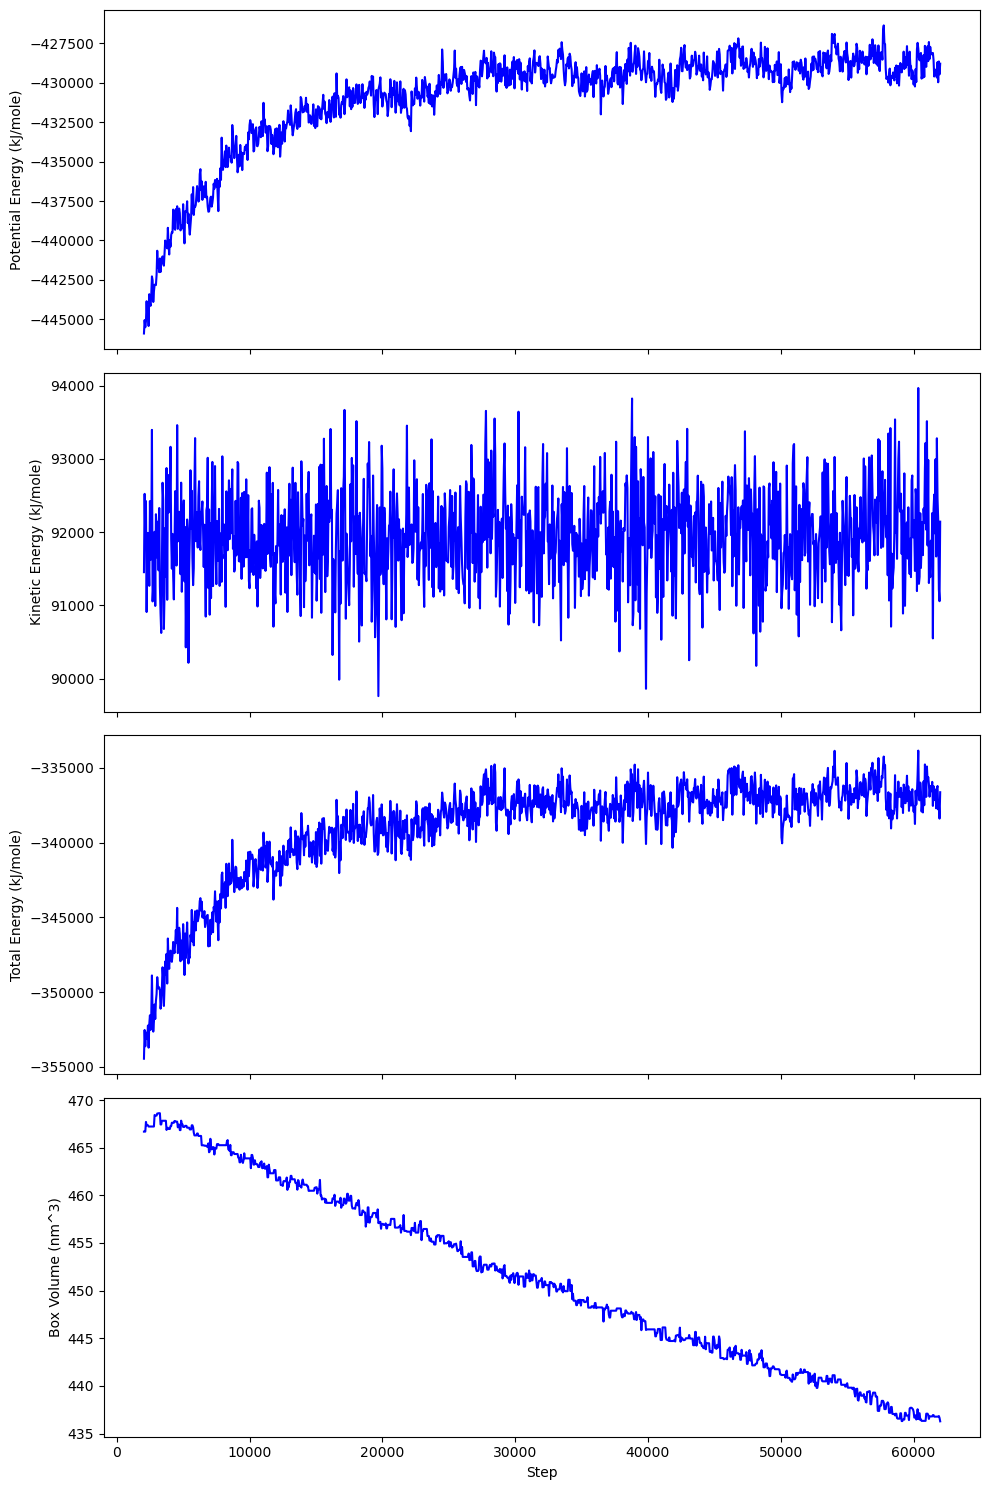

In [21]:
import matplotlib.pyplot as plt

# Reading the entire CSV file
data = pd.read_csv(report_file_path)

# Setting up the plot
fig, axs = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

# Plotting each column against "Step"
columns = ["Potential Energy (kJ/mole)", "Kinetic Energy (kJ/mole)", "Total Energy (kJ/mole)", "Box Volume (nm^3)"]
for i, col in enumerate(columns, 1):
    axs[i-1].plot(data["#\"Step\""], data[col], color='blue')
    axs[i-1].set_ylabel(col)
    if i == 4:
        axs[i-1].set_xlabel("Step")

# Adjusting layout
plt.tight_layout()
plt.show()
